In [1]:
print("Hello World")

Hello World


In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset,DataLoader

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
def parkingStatus(sent):
    sent = str(sent)
    x = sent.split()
    if x[0] == '0':
        return "Not Available"
    elif x[-1] in ('Covered','Covered,'):
        return "Covered"
    else :
        return x[-1]

In [6]:
def number_of_parking(sent):
    sent = str(sent)
    x = sent.split()
    return float(x[0])

In [7]:
def building_floors(sent):
    sent = str(sent)
    x = sent.split()
    if x[-1] in ("Basement","Ground"):
        return 0
    return float(x[-1])

In [8]:
def number_of_floor(sent):
    sent = str(sent)
    x = sent.split()
    if x[0] == "Lower":
        return -2

    elif x[0] == "Upper":
        return -1
    elif x[0] == "Ground":
        return 0
    else :
        return float(x[0])

In [9]:
def get_metric(sent):
    sent = str(sent)
    if sent == "0":
        return 0
    else:
        metric = sent.split()[-1]
        value = sent.split()[0]
        value = value.split(',')
        area = np.nan
        if len(value) == 2:
            value = (float(value[0])*10**len(value[1])) + float(value[1])
        else :
            value = float(value[0])
            
        if (metric == "aankadam"):
            area = value * 6.689025353264152
        elif (metric == 'acre'):
            area = value * 4046.8603387248118
        elif (metric == "cent"):
            area = value * 40.46860338724812
        elif (metric == "ground"):
            area = value * 222.96751177547173
        elif(metric == "kanal"):
            area = value * 505.85754234060147
        elif (metric == "marla"):
            area = value * 25.292970020159977
        elif (metric == "sqft"):
            area = value * 0.09290312990644656
        elif (metric == "sqyrd"):
            area = value * 0.836128169158019
        elif (metric == "sqm"):
            area = value
        elif (metric == "bigha"):
            area = value * 1337.8050706528304
        else :
            print(sent)
            
        return area

In [10]:
data = pd.read_csv("HP/house_prices.csv")
data.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [11]:
data.isna().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [12]:
data.drop(['Dimensions','Plot Area','Title','Description'],axis=1,inplace=True)
data.head()

,Index,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area
0,0,42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN
1,1,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN
2,2,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN
3,3,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN
4,4,1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN


### Dealing with nan values

In [13]:
data['Car Parking'].replace(np.nan,'0',inplace=True)

In [14]:
data['Parking'] = data['Car Parking'].apply(parkingStatus)

In [15]:
data['Parking Slots'] = data['Car Parking'].apply(number_of_parking)

In [16]:
data.drop('Car Parking',axis=1,inplace=True)

In [17]:
data.dropna(subset=['Price (in rupees)'],inplace=True)

In [18]:
data.drop('Amount(in rupees)',axis=1,inplace=True)

In [19]:
data["Carpet Area"].replace(np.nan,"0",inplace=True)

In [20]:
data["Status"] = data["Status"].map({"Ready to Move":1,np.nan:0})

In [21]:
data.dropna(subset=['Floor'],inplace=True)

In [22]:
data['Building Height'] = data['Floor'].apply(building_floors)

In [23]:
data['Floor'] = data['Floor'].apply(number_of_floor)

In [24]:
data["Transaction"].replace(np.nan,"Other",inplace=True)

In [25]:
data.dropna(subset=['Furnishing'],axis=0,inplace=True)

In [26]:
data["facing"].replace(np.nan,"All",inplace=True)

In [27]:
data['overlooking'].replace(np.nan,"Nothing",inplace=True)

In [28]:
data.drop("Society",axis=1,inplace=True)

In [29]:
data["Bathroom"].replace(np.nan,2,inplace=True)
data["Bathroom"].replace('> 10',11,inplace=True)

In [30]:
data["Balcony"].replace('> 10',11,inplace=True)
data["Balcony"].replace(np.nan,0,inplace=True)

In [31]:
data['Ownership'].replace(np.nan,"Nothing",inplace=True)

In [32]:
data["Super Area"].replace(np.nan,0,inplace=True)
data["Super Area"] = data["Super Area"].apply(get_metric)

In [33]:
data["Carpet Area"] = data["Carpet Area"].apply(get_metric)

In [34]:
data.drop('Index',axis=1,inplace=True)

In [35]:
data.rename(columns={"Price (in rupees)":"Price"},inplace=True)

In [36]:
data.head(2)

,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Super Area,Parking,Parking Slots,Building Height
0,6000.0,thane,46.451565,1,10.0,Resale,Unfurnished,All,Nothing,1,2,Nothing,0.0,Not Available,0.0,11.0
1,13799.0,thane,43.943180,1,3.0,Resale,Semi-Furnished,East,Garden/Park,2,0,Freehold,0.0,Open,1.0,22.0


In [37]:
data.dtypes

Price              float64
location            object
Carpet Area        float64
Status               int64
Floor              float64
Transaction         object
Furnishing          object
facing              object
overlooking         object
Bathroom            object
Balcony             object
Ownership           object
Super Area         float64
Parking             object
Parking Slots      float64
Building Height    float64
dtype: object

In [38]:
data["Balcony"] = data["Balcony"].astype(float)
data["Bathroom"] = data["Bathroom"].astype(float)
data["Status"] = data["Status"].astype(float)

In [39]:
data.corr(numeric_only=True)

,Price,Carpet Area,Status,Floor,Bathroom,Balcony,Super Area,Parking Slots,Building Height
Price,1.000000,-0.000142,0.003646,0.033800,0.060539,0.037657,-0.001068,-0.003397,0.038145
Carpet Area,-0.000142,1.000000,0.000372,-0.000721,0.001653,0.000970,-0.000065,-0.000023,-0.000600
Status,0.003646,0.000372,1.000000,0.021400,0.022289,0.004412,0.000094,-0.003639,0.015857
Floor,0.033800,-0.000721,0.021400,1.000000,0.260113,0.240208,-0.002079,0.010627,0.732460
Bathroom,0.060539,0.001653,0.022289,0.260113,1.000000,0.370546,0.001225,-0.012193,0.271989
Balcony,0.037657,0.000970,0.004412,0.240208,0.370546,1.000000,-0.000664,0.033321,0.216883
Super Area,-0.001068,-0.000065,0.000094,-0.002079,0.001225,-0.000664,1.000000,-0.000605,-0.001231
Parking Slots,-0.003397,-0.000023,-0.003639,0.010627,-0.012193,0.033321,-0.000605,1.000000,-0.002807
Building Height,0.038145,-0.000600,0.015857,0.732460,0.271989,0.216883,-0.001231,-0.002807,1.000000


In [40]:
data.head(1)

,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Super Area,Parking,Parking Slots,Building Height
0,6000.0,thane,46.451565,1.0,10.0,Resale,Unfurnished,All,Nothing,1.0,2.0,Nothing,0.0,Not Available,0.0,11.0


In [41]:
data.describe()

,Price,Carpet Area,Status,Floor,Bathroom,Balcony,Super Area,Parking Slots,Building Height
count,1.616470e+05,1.616470e+05,161647.000000,161647.000000,161647.000000,161647.000000,1.616470e+05,161647.000000,161647.000000
mean,7.556557e+03,1.182266e+02,0.996771,4.563289,2.443058,1.557158,9.440593e+01,1.925207,8.954419
std,2.788331e+04,1.601824e+04,0.056735,4.733776,0.857451,1.206836,1.074352e+04,22.113989,7.647787
min,0.000000e+00,0.000000e+00,0.000000,-2.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4.280000e+03,0.000000e+00,1.000000,2.000000,2.000000,1.000000,0.000000e+00,0.000000,4.000000
50%,6.034000e+03,5.574188e+01,1.000000,3.000000,2.000000,2.000000,0.000000e+00,0.000000,6.000000
75%,9.526500e+03,1.115767e+02,1.000000,6.000000,3.000000,2.000000,1.089754e+02,1.000000,12.000000
max,6.700000e+06,6.070291e+06,1.000000,200.000000,11.000000,11.000000,4.038767e+06,999.000000,200.000000


In [42]:
data['Super Area'] = (data['Super Area'] - data['Super Area'].mean())/data['Super Area'].std()

In [43]:
data['Carpet Area'] = (data['Carpet Area'] - data['Carpet Area'].mean())/data['Carpet Area'].std()

In [44]:
data['Parking Slots'] = (data['Parking Slots'] - data['Parking Slots'].mean())/data['Parking Slots'].std()

In [45]:
avg_price = data['Price'].mean()
std_price = data['Price'].std()
data['Price'] = (data['Price'] - avg_price)/std_price

In [46]:
import seaborn as sns

In [47]:
left = data['Price'].mean()-2*data['Price'].std()
right = data['Price'].mean()+2*data['Price'].std()

In [48]:
data_outliernt = data[(data['Price'] < right) & (data['Price']>left)]

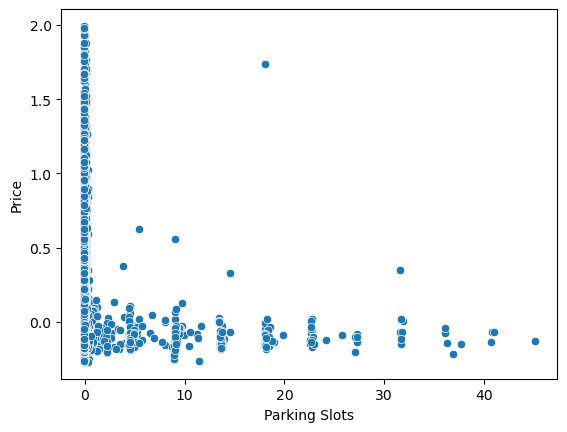

In [49]:
sns.scatterplot(x="Parking Slots",y="Price",data=data_outliernt)
plt.show()

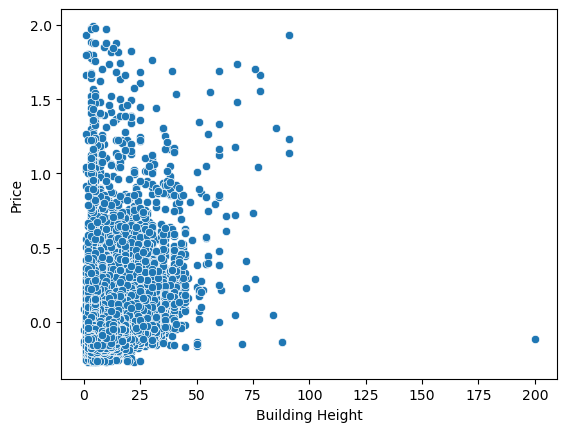

In [50]:
sns.scatterplot(x="Building Height",y="Price",data=data_outliernt)
plt.show()

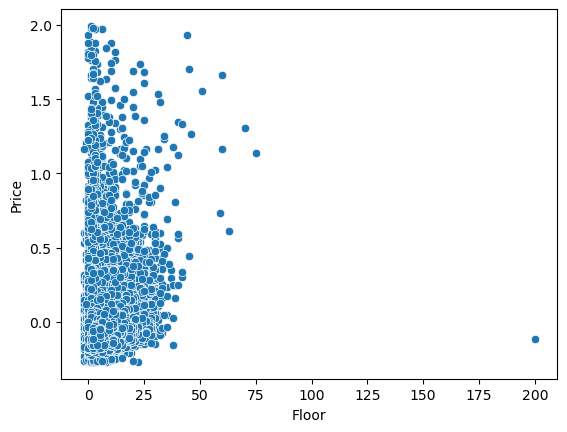

In [51]:
sns.scatterplot(x="Floor",y="Price",data=data_outliernt)
plt.show()

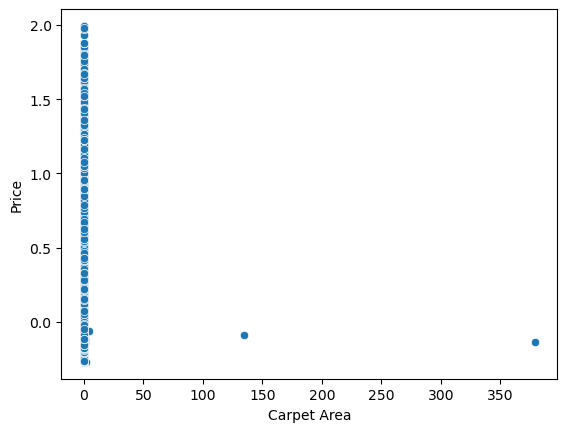

In [52]:
sns.scatterplot(x="Carpet Area",y="Price",data=data_outliernt)
plt.show()

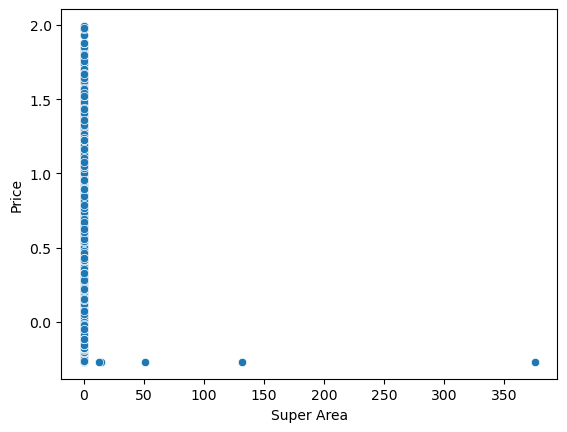

In [53]:
sns.scatterplot(x="Super Area",y="Price",data=data_outliernt)
plt.show()

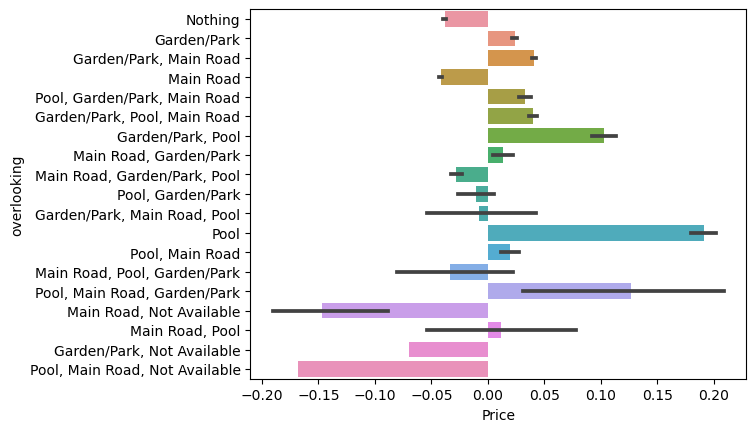

In [54]:
sns.barplot(x="Price",y="overlooking",data=data_outliernt)
plt.show()

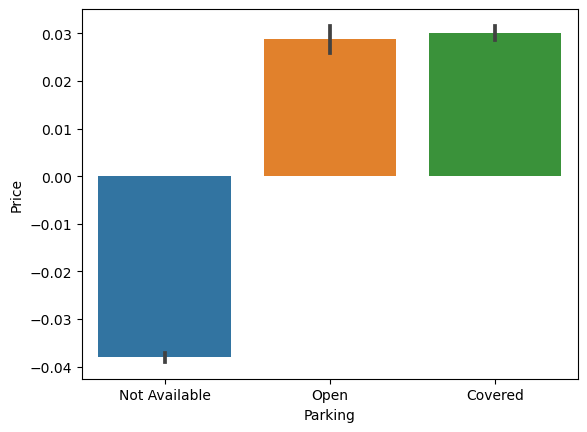

In [55]:
sns.barplot(x="Parking",y="Price",data=data_outliernt)
plt.show()

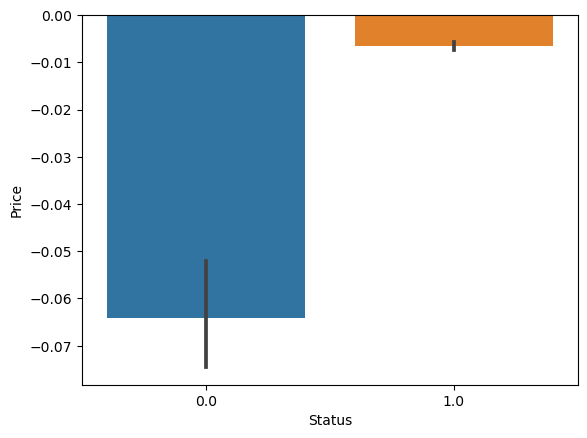

In [56]:
sns.barplot(x="Status",y="Price",data=data_outliernt)
plt.show()

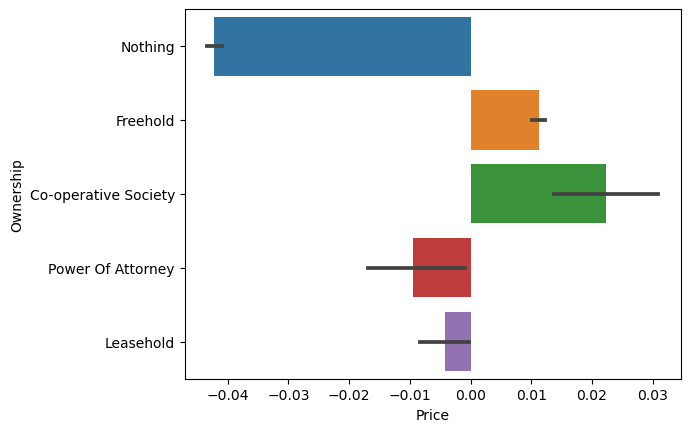

In [57]:
sns.barplot(y="Ownership",x="Price",data=data_outliernt)
plt.show()

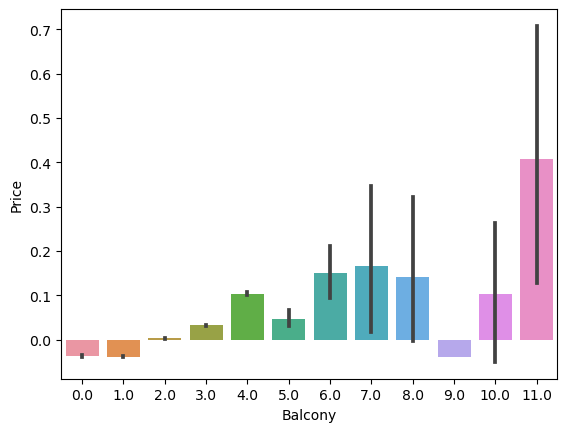

In [58]:
sns.barplot(x="Balcony",y="Price",data=data_outliernt)
plt.show()

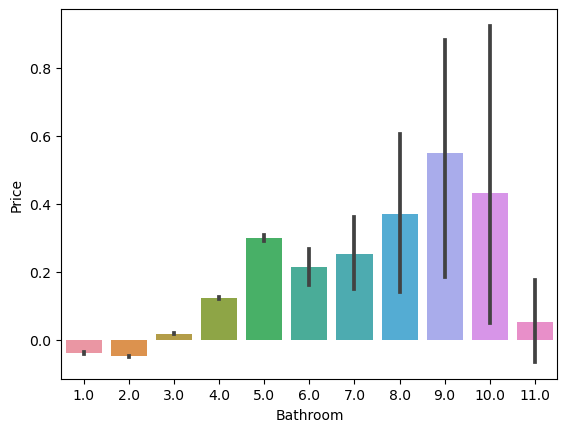

In [59]:
sns.barplot(x="Bathroom",y="Price",data=data_outliernt)
plt.show()

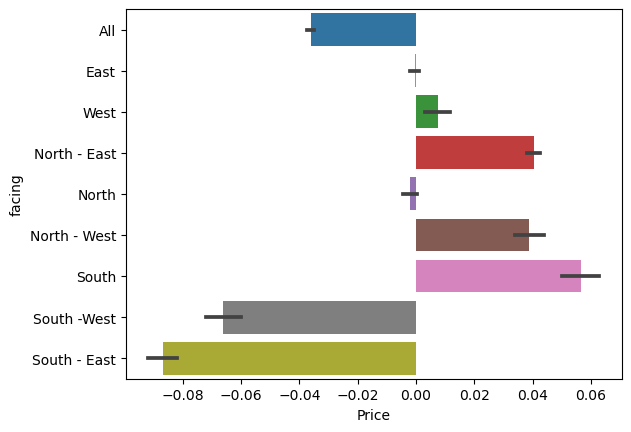

In [60]:
sns.barplot(x="Price",y="facing",data=data_outliernt)
plt.show()

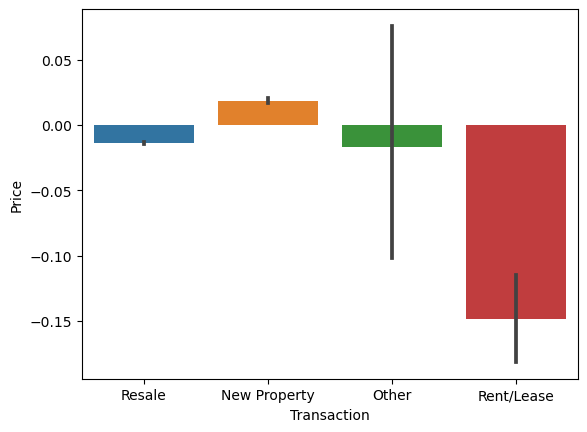

In [61]:
sns.barplot(x="Transaction",y="Price",data=data_outliernt)
plt.show()

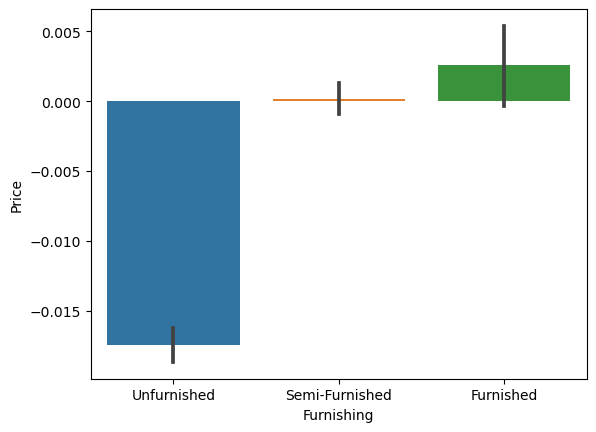

In [62]:
sns.barplot(x="Furnishing",y="Price",data=data_outliernt)
plt.show()

In [63]:
data.head(1)

,Price,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Super Area,Parking,Parking Slots,Building Height
0,-0.055824,thane,-0.004481,1.0,10.0,Resale,Unfurnished,All,Nothing,1.0,2.0,Nothing,-0.008787,Not Available,-0.087058,11.0


In [64]:
one_hot_facing = pd.get_dummies(data['facing'],dtype=float)
one_hot_furnishing = pd.get_dummies(data["Furnishing"],dtype=float)
one_hot_transaction = pd.get_dummies(data["Transaction"],dtype=float)
one_hot_location = pd.get_dummies(data["location"],dtype=float)
one_hot_overlooking = pd.get_dummies(data['overlooking'],dtype=float)
one_hot_ownership = pd.get_dummies(data['Ownership'],dtype=float)
one_hot_parking = pd.get_dummies(data['Parking'],dtype=float)
data = pd.concat([data,one_hot_facing,one_hot_furnishing,one_hot_location,one_hot_transaction,one_hot_overlooking,one_hot_ownership,one_hot_parking],axis=1)
data.drop(['facing','Furnishing','Transaction','location','overlooking','Ownership','Parking'],axis=1,inplace=True)

### Making a model

In [65]:
class housesPrice(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx],dtype=torch.float32),torch.tensor(self.y[idx],dtype=torch.float32)

In [66]:
class ModelV1(nn.Module):
    def __init__(self,in_features,nn_number,out_features):
        super().__init__()
        self.block = nn.Sequential(
            nn.Linear(in_features=in_features,out_features=nn_number),
            nn.Dropout(0.1),
            nn.ReLU(),
            nn.Linear(in_features=nn_number,out_features=nn_number),
            nn.Dropout(0.1),
            nn.ReLU(),
            nn.Linear(in_features=nn_number,out_features=nn_number),
            nn.Dropout(0.1),
            nn.ReLU(),
            nn.Linear(in_features=nn_number,out_features=nn_number),
            nn.Dropout(0.1),
            nn.ReLU(),
            nn.Linear(in_features=nn_number,out_features=out_features),
        )
    
    def forward(self,x):
        return self.block(x)

### Removing Carpet Area and Super Area from the data

In [67]:
X = data.drop(['Price','Carpet Area','Super Area'],axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [68]:
BATCH_SIZE = 96
trainDataset = housesPrice(X_train,y_train)
testDataset = housesPrice(X_test,y_test)
train_dataloader = DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(testDataset, batch_size=BATCH_SIZE, shuffle=True)

In [69]:
model_1 = ModelV1(in_features=X_train.shape[-1],nn_number=32,out_features=1)
model_1.to(device)

ModelV1(
  (block): Sequential(
    (0): Linear(in_features=130, out_features=32, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): Dropout(p=0.1, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): Dropout(p=0.1, inplace=False)
    (8): ReLU()
    (9): Linear(in_features=32, out_features=32, bias=True)
    (10): Dropout(p=0.1, inplace=False)
    (11): ReLU()
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [70]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

In [71]:
trplt = []
teplt = []

In [75]:
epochs = 300
for epoch in range(epochs):
    model_1.train()
    trloss,teloss =0,0
    for tri,(features,labels) in enumerate(train_dataloader):
        features = features.to(device)
        labels = labels.unsqueeze(1).to(device)
        
        preds = model_1(features)
        loss = loss_fn(preds,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        trloss += loss
    
    model_1.eval()
    for tei,(features,labels) in enumerate(test_dataloader):
        features = features.to(device)
        labels = labels.unsqueeze(1).to(device)
        with torch.inference_mode():
            preds = model_1(features)
            loss = loss_fn(preds,labels)
            teloss += loss
    
    trplt.append(trloss.cpu().detach()/(tri+1))
    teplt.append(teloss.cpu()/(tei+1))
    print(f"Epoch {epoch+1}/{epochs} : Train loss = {trloss/(tri+1)} | Test loss = {teloss/(tei+1)}")

Epoch 1/250 : Train loss = 0.043221890926361084 | Test loss = 0.03350464627146721
Epoch 2/250 : Train loss = 0.043161556124687195 | Test loss = 0.033813729882240295
Epoch 3/250 : Train loss = 0.043181464076042175 | Test loss = 0.034382592886686325
Epoch 4/250 : Train loss = 0.04306225851178169 | Test loss = 0.031464654952287674
Epoch 5/250 : Train loss = 0.04299486055970192 | Test loss = 0.03439794108271599
Epoch 6/250 : Train loss = 0.04298397898674011 | Test loss = 0.032052673399448395
Epoch 7/250 : Train loss = 0.043060027062892914 | Test loss = 0.03405549004673958
Epoch 8/250 : Train loss = 0.04284358024597168 | Test loss = 0.033313192427158356
Epoch 9/250 : Train loss = 0.04290235415101051 | Test loss = 0.033400893211364746
Epoch 10/250 : Train loss = 0.04308388754725456 | Test loss = 0.033736955374479294
Epoch 11/250 : Train loss = 0.0430370457470417 | Test loss = 0.03198325261473656
Epoch 12/250 : Train loss = 0.04292106628417969 | Test loss = 0.03581124171614647
Epoch 13/250 : 

Epoch 101/250 : Train loss = 0.041986264288425446 | Test loss = 0.03399965167045593
Epoch 102/250 : Train loss = 0.042058177292346954 | Test loss = 0.03443724289536476
Epoch 103/250 : Train loss = 0.04202393442392349 | Test loss = 0.03284570574760437
Epoch 104/250 : Train loss = 0.04214153811335564 | Test loss = 0.03501298278570175
Epoch 105/250 : Train loss = 0.04200517758727074 | Test loss = 0.03413696959614754
Epoch 106/250 : Train loss = 0.04195719212293625 | Test loss = 0.03481818735599518
Epoch 107/250 : Train loss = 0.041956909000873566 | Test loss = 0.033204417675733566
Epoch 108/250 : Train loss = 0.042038463056087494 | Test loss = 0.03280718997120857
Epoch 109/250 : Train loss = 0.04194524884223938 | Test loss = 0.032595593482255936
Epoch 110/250 : Train loss = 0.0419132225215435 | Test loss = 0.03267892822623253
Epoch 111/250 : Train loss = 0.042026326060295105 | Test loss = 0.03263138234615326
Epoch 112/250 : Train loss = 0.04190482571721077 | Test loss = 0.0332814753055572

Epoch 200/250 : Train loss = 0.04168461263179779 | Test loss = 0.03413663059473038
Epoch 201/250 : Train loss = 0.04167511314153671 | Test loss = 0.03335624933242798
Epoch 202/250 : Train loss = 0.04167419299483299 | Test loss = 0.032719530165195465
Epoch 203/250 : Train loss = 0.04165301099419594 | Test loss = 0.034223757684230804
Epoch 204/250 : Train loss = 0.04167580232024193 | Test loss = 0.03396376967430115
Epoch 205/250 : Train loss = 0.04157804697751999 | Test loss = 0.034417808055877686
Epoch 206/250 : Train loss = 0.04155412316322327 | Test loss = 0.03266553580760956
Epoch 207/250 : Train loss = 0.04156213253736496 | Test loss = 0.033093757927417755
Epoch 208/250 : Train loss = 0.04150695353746414 | Test loss = 0.03530870005488396
Epoch 209/250 : Train loss = 0.04161977022886276 | Test loss = 0.03165248781442642
Epoch 210/250 : Train loss = 0.04149385169148445 | Test loss = 0.03549711033701897
Epoch 211/250 : Train loss = 0.0416020005941391 | Test loss = 0.03392931446433067
E

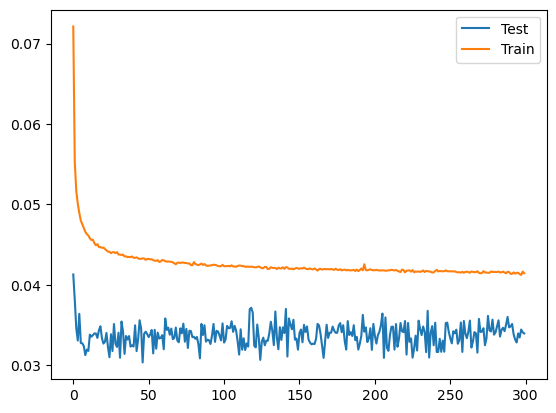

In [76]:
plt.plot(np.arange(len(teplt)),teplt)
plt.plot(np.arange(len(teplt)),trplt)
plt.legend(['Test','Train'])
plt.show()

In [77]:
n = np.random.randint(len(X_test))
feat = torch.tensor(X_test[n],dtype=torch.float32).to(device)
a,b = model_1(feat),y_test[n]
print(f"True Value is {((b*std_price)+avg_price).item()} Rupee | Predicted {((a*std_price)+avg_price).item()} Rupee")

True Value is 5574.0 Rupee | Predicted 5483.98681640625 Rupee
